<a href="https://colab.research.google.com/github/aaronpetryio/ffdp-exercises/blob/main/ffdp_vor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/74b84c5fb2371b954b52b4f67ae5220930d57861/fantasypros/fp_projections.csv')

In [56]:
df.head()

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [57]:
df = df.iloc[:, 1:]

In [58]:
df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [59]:
df.columns

Index(['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds', 'ReceivingTD',
       'FL', 'RushingAtt', 'RushingYds', 'RushingTD', 'PassingAtt',
       'PassingCmp', 'PassingYds', 'PassingTD', 'Int', 'FieldGoalsMade',
       'FieldGoalsAttempted', 'ExtraPointsMade', 'TotalSacks', 'TotalInt',
       'FumblesRecovered', 'FumblesForced', 'DefensiveTDs', 'SafetysForced',
       'PointsAllowed', 'FantasyPoints'],
      dtype='object')

In [60]:
', '.join(df.columns)

'Player, Team, Pos, Receptions, ReceivingYds, ReceivingTD, FL, RushingAtt, RushingYds, RushingTD, PassingAtt, PassingCmp, PassingYds, PassingTD, Int, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade, TotalSacks, TotalInt, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, FantasyPoints'

In [61]:
scoring_weights = {
    'receptions': 1, 
    'receiving_yds': 0.1,
    'receiving_tds': 6,
    'FL': -2, 
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

In [62]:
df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + df['ReceivingTD']*scoring_weights['receiving_tds'] + \
    df['FL']*scoring_weights['FL'] + df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + df['PassingYds']*scoring_weights['passing_yds'] + \
    df['PassingTD']*scoring_weights['passing_td'] + df['Int']*scoring_weights['int']
)

In [63]:
df['FantasyPoints']

0      361.124
1      345.384
2      318.416
3      312.888
4      308.462
5      297.482
6      295.652
7      289.390
8      279.616
9      277.432
10     276.228
11     274.890
12     375.060
13     267.554
14     260.608
15     259.326
16     258.048
17     253.094
18     251.740
19     251.500
20     246.772
21     245.542
22     245.184
23     310.790
24     243.696
25     299.750
26     261.780
27     239.328
28     235.252
29     232.434
30     289.980
31     229.760
32     226.866
33     295.950
34     333.180
35     254.230
36     240.980
37     224.940
38     249.220
39     239.980
40     300.450
41     222.940
42     246.120
43     252.900
44     286.360
45     215.870
46     259.170
47     176.756
48     216.590
49     214.980
50     211.410
51     168.048
52     250.020
53     261.160
54     206.720
55     236.860
56     255.440
57     217.900
58     235.180
59     241.630
60     241.440
61     230.990
62     238.820
63     217.370
64     229.920
65     230.840
66     179

In [64]:
rb_df = df.loc[df['Pos'] == 'RB', ['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds']]

In [65]:
rb_df.head()

,Player,Team,Pos,Receptions,ReceivingYds
12,Christian McCaffrey,CAR,RB,102.8,855.8
23,Saquon Barkley,NYG,RB,66.2,536.9
25,Ezekiel Elliott,DAL,RB,59.3,468.6
26,Derrick Henry,TEN,RB,21.5,183.7
30,Dalvin Cook,MIN,RB,58.1,519.8


In [66]:
rb_df = df.loc[df['Pos'] == 'RB'] 

rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Receptions,155.0,17.506452,18.480993,0.40,4.05,10.60,24.000,102.80
ReceivingYds,155.0,140.300645,153.581122,3.10,30.30,85.70,198.100,855.80
ReceivingTD,155.0,0.708387,0.882143,0.00,0.10,0.30,1.000,4.50
FL,155.0,0.712903,0.757106,0.00,0.00,0.50,1.300,2.70
RushingAtt,155.0,78.225161,82.304474,0.00,6.75,46.70,137.900,294.80
RushingYds,155.0,334.525161,359.322937,2.50,45.80,176.70,559.900,1481.10
RushingTD,155.0,2.428387,2.723008,0.00,0.30,1.20,3.900,12.10
PassingAtt,155.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
PassingCmp,155.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
PassingYds,155.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


In [67]:
type(rb_df['RushingAtt'])

pandas.core.series.Series

In [68]:
df.sort_values(by='RushingYds', ascending=False).head(15)

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
26,Derrick Henry,TEN,RB,21.5,183.7,1.0,2.4,294.8,1481.1,12.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.780
25,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299.750
37,Nick Chubb,CLE,RB,24.8,191.5,1.1,2.1,275.4,1251.9,8.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.940
23,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.790
41,Josh Jacobs,LV,RB,28.5,222.1,0.8,2.0,267.4,1186.3,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.940
36,Joe Mixon,CIN,RB,39.7,306.2,1.7,1.8,269.5,1178.6,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.980
30,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.980
12,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.060
45,Chris Carson,SEA,RB,31.5,245.1,1.3,2.4,244.0,1100.6,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.870
38,Miles Sanders,PHI,RB,51.7,462.6,2.4,2.1,234.7,1050.6,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249.220


In [69]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/PPR_ADP.csv', index_col=0)

In [70]:
adp_df.head()

,PLAYER,POS,AVG
0,Christian McCaffrey,RB,1.0
1,Saquon Barkley,RB,2.0
2,Ezekiel Elliott,RB,3.5
3,Michael Thomas,WR,4.0
4,Dalvin Cook,RB,5.0


In [71]:
adp_df['ADP RANK'] = adp_df['AVG'].rank()

In [72]:
adp_df_cutoff = adp_df[:100]

In [73]:
replacement_players = {
    'RB': '',
    'WR': '',
    'QB': '',
    'TE': ''
}

for _, row in adp_df_cutoff.iterrows():
  position = row['POS']
  player = row['PLAYER']

  if position in replacement_players:
    replacement_players[position] = player

In [74]:
replacement_players

{'RB': 'Latavius Murray',
 'WR': 'Jamison Crowder',
 'QB': 'Aaron Rodgers',
 'TE': 'Rob Gronkowski'}

In [75]:
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]

In [76]:
df.head()

,Player,Pos,Team,FantasyPoints
0,Lamar Jackson,QB,BAL,361.124
1,Patrick Mahomes,QB,KC,345.384
2,Dak Prescott,QB,DAL,318.416
3,Deshaun Watson,QB,HOU,312.888
4,Russell Wilson,QB,SEA,308.462


In [77]:
replacement_values = {}

for position, player_name in replacement_players.items():
  player = df.loc[df['Player'] == player_name]
  replacement_values[position] = player['FantasyPoints'].tolist()[0]

In [78]:
replacement_values

{'RB': 118.62, 'WR': 192.27999999999997, 'QB': 277.432, 'TE': 139.5}

In [79]:
pd.set_option('chained_assignment', None)

In [80]:
df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

In [81]:
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis = 1
)

In [82]:
df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Lamar Jackson,QB,BAL,361.124,83.692
1,Patrick Mahomes,QB,KC,345.384,67.952
2,Dak Prescott,QB,DAL,318.416,40.984
3,Deshaun Watson,QB,HOU,312.888,35.456
4,Russell Wilson,QB,SEA,308.462,31.030


In [83]:
pd.set_option('display.max_rows', None)

In [84]:
df['VOR Rank'] = df['VOR'].rank(ascending=False)

In [85]:
df.sort_values(by='VOR Rank', ascending=True).head()

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.06,256.44,1.0
23,Saquon Barkley,RB,NYG,310.79,192.17,2.0
25,Ezekiel Elliott,RB,DAL,299.75,181.13,3.0
33,Alvin Kamara,RB,NO,295.95,177.33,4.0
30,Dalvin Cook,RB,MIN,289.98,171.36,5.0


In [86]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,-176.720337,122.762942,-277.432,-272.7440,-265.39,-33.736,83.692
RB,155.0,-36.236129,83.097178,-117.570,-103.8800,-64.80,6.765,256.440
TE,128.0,-81.878203,54.454555,-139.500,-122.0725,-104.45,-50.840,115.940
WR,245.0,-114.184694,79.501235,-192.280,-181.1000,-151.34,-52.910,140.900


In [87]:
df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))

In [89]:
df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.060,1.000000,1.0
23,Saquon Barkley,RB,NYG,310.790,0.879615,2.0
25,Ezekiel Elliott,RB,DAL,299.750,0.858936,3.0
33,Alvin Kamara,RB,NO,295.950,0.851818,4.0
30,Dalvin Cook,RB,MIN,289.980,0.840636,5.0
26,Derrick Henry,RB,TEN,261.780,0.787814,6.0
34,Michael Thomas,WR,NO,333.180,0.783581,7.0
35,Clyde Edwards-Helaire,RB,KC,254.230,0.773672,8.0
43,Austin Ekeler,RB,LAC,252.900,0.771181,9.0
38,Miles Sanders,RB,PHI,249.220,0.764288,10.0


In [90]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,0.188644,0.229948,0.000000,0.008781,0.022556,0.456469,0.676424
RB,155.0,0.451786,0.155650,0.299439,0.325082,0.398283,0.532332,1.000000
TE,128.0,0.366293,0.101999,0.258362,0.291005,0.324014,0.424431,0.736828
WR,245.0,0.305780,0.148914,0.159499,0.180440,0.236184,0.420554,0.783581


In [91]:
df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis = 1)

df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank
12,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0
23,Saquon Barkley,RB,NYG,310.79,0.879615,2.0
25,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0
33,Alvin Kamara,RB,NO,295.95,0.851818,4.0
30,Dalvin Cook,RB,MIN,289.98,0.840636,5.0


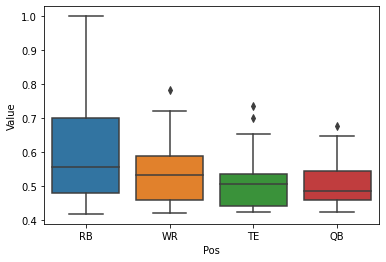

In [96]:
import seaborn as sns

num_teams = 12
num_spots = 16
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['Value']);

In [97]:
adp_df.head()

,PLAYER,POS,AVG,ADP RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0


In [98]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis = 1)

In [101]:
final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank
0,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0,1.0,1.0
1,Saquon Barkley,RB,NYG,310.79,0.879615,2.0,2.0,2.0
2,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0,3.5,3.0
3,Alvin Kamara,RB,NO,295.95,0.851818,4.0,5.5,6.0
4,Dalvin Cook,RB,MIN,289.98,0.840636,5.0,5.0,5.0


In [106]:
final_df['Diff in ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']

final_df = final_df.dropna()

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0,1.0,1.0,0.0
1,Saquon Barkley,RB,NYG,310.79,0.879615,2.0,2.0,2.0,0.0
2,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0,3.5,3.0,0.0
3,Alvin Kamara,RB,NO,295.95,0.851818,4.0,5.5,6.0,2.0
4,Dalvin Cook,RB,MIN,289.98,0.840636,5.0,5.0,5.0,0.0


In [107]:
final_df.sort_values(by='Diff in ADP and Value')

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
563,Jalen Hurts,QB,PHI,35.904,0.067252,564.0,223.0,228.0,-336.0
577,Jarrett Stidham,QB,NE,10.730,0.020098,578.0,290.0,297.0,-281.0
571,Mason Rudolph,QB,PIT,14.120,0.026448,572.0,337.0,337.0,-235.0
565,Marcus Mariota,QB,LV,26.816,0.050229,566.0,331.0,332.0,-234.0
569,Jameis Winston,QB,NO,14.596,0.027340,570.0,346.0,345.0,-225.0
523,Justin Herbert,QB,LAC,94.174,0.176398,524.0,294.0,302.5,-221.5
576,Jordan Love,QB,GB,11.290,0.021147,577.0,360.0,358.0,-219.0
572,Kyle Allen,QB,WAS,12.042,0.022556,573.0,362.0,360.0,-213.0
442,Ryan Fitzpatrick,QB,MIA,124.124,0.232498,443.0,239.5,245.0,-198.0
357,Denzel Mims,WR,NYJ,77.010,0.303747,358.0,179.0,177.0,-181.0


In [109]:
draft_pool = final_df.sort_values(by='ADP Rank')[:196]

rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [110]:
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
65,Ryquell Armstead,RB,JAC,140.35,0.560363,66.0,138.5,136.0,70.0
80,Antonio Gibson,RB,WAS,129.26,0.539590,81.0,141.0,140.0,59.0
138,Darrynton Evans,RB,TEN,90.65,0.467269,139.0,193.5,191.0,52.0
30,Ronald Jones II,RB,TB,179.79,0.634238,31.0,83.0,78.0,47.0
35,Tarik Cohen,RB,CHI,171.24,0.618223,36.0,87.5,83.0,47.0
74,Duke Johnson,RB,HOU,134.83,0.550023,75.0,125.0,121.0,46.0
104,Adrian Peterson,RB,WAS,114.31,0.511587,105.0,147.0,147.0,42.0
58,Kerryon Johnson,RB,DET,149.42,0.577352,59.0,100.0,98.5,39.5
40,James White,RB,NE,166.68,0.609682,41.0,75.5,74.0,33.0
33,Kareem Hunt,RB,CLE,174.14,0.623655,34.0,60.0,64.5,30.5


In [111]:
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
230,Justice Hill,RB,BAL,37.94,0.368538,231.0,202.0,200.0,-31.0
202,Rashaad Penny,RB,SEA,57.46,0.405101,203.0,181.0,179.0,-24.0
128,Ke'Shawn Vaughn,RB,TB,100.07,0.484914,129.0,108.5,110.0,-19.0
132,Alexander Mattison,RB,MIN,95.05,0.475511,133.0,123.0,118.0,-15.0
108,Sony Michel,RB,NE,111.23,0.505818,109.0,96.5,95.0,-14.0
96,J.K. Dobbins,RB,BAL,119.25,0.520840,97.0,88.0,85.5,-11.5
223,Jaylen Samuels,RB,PIT,40.89,0.374063,224.0,214.0,216.0,-8.0
172,A.J. Dillon,RB,GB,72.61,0.433478,173.0,166.5,166.5,-6.5
188,Damien Harris,RB,NE,66.53,0.422090,189.0,187.0,185.0,-4.0
11,Joe Mixon,RB,CIN,240.98,0.748854,12.0,10.0,9.0,-3.0


In [112]:
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
177,Cole Beasley,WR,BUF,144.38,0.429938,178.0,217.5,219.0,41.0
127,Golden Tate,WR,NYG,174.00,0.485420,128.0,139.0,137.0,9.0
39,Robert Woods,WR,LAR,241.44,0.611742,40.0,46.0,46.0,6.0
157,Breshad Perriman,WR,NYJ,155.10,0.450018,158.0,162.5,160.5,2.5
196,Corey Davis,WR,TEN,135.67,0.413623,197.0,200.0,198.0,1.0
164,Hunter Renfrow,WR,LV,150.09,0.440634,165.0,165.0,165.0,0.0
99,Jamison Crowder,WR,NYJ,192.28,0.519660,99.5,100.0,98.5,-1.0
6,Michael Thomas,WR,NO,333.18,0.783581,7.0,4.0,4.0,-3.0
130,Preston Williams,WR,MIA,172.03,0.481730,131.0,130.0,128.0,-3.0
218,Randall Cobb,WR,HOU,119.51,0.383354,219.0,213.5,215.0,-4.0


In [113]:
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
357,Denzel Mims,WR,NYJ,77.01,0.303747,358.0,179.0,177.0,-181.0
394,Devin Duvernay,WR,BAL,63.90,0.279191,395.0,212.0,214.0,-181.0
316,Willie Snead,WR,BAL,85.29,0.319256,317.0,217.0,218.0,-99.0
271,John Ross,WR,CIN,97.67,0.342445,272.0,182.0,180.0,-92.0
287,Kenny Stills,WR,HOU,92.78,0.333286,288.0,203.0,202.5,-85.5
213,Mecole Hardman,WR,KC,123.03,0.389947,214.0,139.5,138.0,-76.0
178,Justin Jefferson,WR,MIN,144.34,0.429863,179.0,108.5,110.0,-69.0
228,Alshon Jeffery,WR,PHI,112.02,0.369324,229.0,162.5,160.5,-68.5
251,Parris Campbell,WR,IND,102.75,0.351961,252.0,188.5,186.5,-65.5
274,James Washington,WR,PIT,96.22,0.339729,275.0,216.0,217.0,-58.0


In [114]:
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
143,Greg Olsen,TE,SEA,109.24,0.462980,144.0,210.5,211.0,67.0
120,Ian Thomas,TE,CAR,125.52,0.493474,121.0,180.5,178.0,57.0
106,Chris Herndon IV,TE,NYJ,132.66,0.506848,107.0,164.0,163.5,56.5
166,Irv Smith Jr.,TE,MIN,96.64,0.439379,167.0,202.5,201.0,34.0
121,Blake Jarwin,TE,DAL,123.75,0.490159,122.0,158.0,156.0,34.0
118,Jack Doyle,TE,IND,126.34,0.495010,119.0,153.5,152.0,33.0
89,Mike Gesicki,TE,MIA,145.07,0.530093,90.0,124.5,120.0,30.0
116,Jonnu Smith,TE,TEN,127.09,0.496415,117.0,145.5,145.5,28.5
85,Hayden Hurst,TE,ATL,148.28,0.536106,86.0,113.0,113.0,27.0
87,Jared Cook,TE,NO,146.40,0.532585,88.0,108.5,110.0,22.0


In [115]:
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
98,Rob Gronkowski,TE,TB,139.50,0.519660,99.5,89.0,89.5,-10.0
21,George Kittle,TE,SF,235.49,0.699460,22.0,20.5,21.5,-0.5
13,Travis Kelce,TE,KC,255.44,0.736828,14.0,17.0,18.0,4.0
41,Mark Andrews,TE,BAL,187.53,0.609626,42.0,47.0,47.0,5.0
90,Austin Hooper,TE,CLE,144.42,0.528876,91.0,103.0,101.0,10.0
64,Hunter Henry,TE,LAC,161.64,0.561131,65.0,80.5,77.0,12.0
66,Tyler Higbee,TE,LAR,160.66,0.559295,67.0,84.0,79.0,12.0
26,Zach Ertz,TE,PHI,210.87,0.653344,27.0,39.0,39.5,12.5
60,Evan Engram,TE,NYG,169.05,0.575010,61.0,75.5,74.0,13.0
110,T.J. Hockenson,TE,DET,131.98,0.505574,111.0,129.5,126.5,15.5


In [116]:
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
113,Cam Newton,QB,NE,267.554,0.501158,114.0,211.0,212.5,98.5
135,Gardner Minshew II,QB,JAC,251.500,0.471087,136.0,174.5,172.0,36.0
159,Teddy Bridgewater,QB,CAR,239.328,0.448287,160.0,194.0,192.5,32.5
176,Derek Carr,QB,LV,229.760,0.430365,177.0,203.0,202.5,25.5
129,Ryan Tannehill,QB,TEN,258.048,0.483352,130.0,143.5,143.0,13.0
149,Kirk Cousins,QB,MIN,245.184,0.459256,150.0,163.5,162.0,12.0
68,Josh Allen,QB,BUF,297.482,0.557216,69.0,85.5,80.5,11.5
55,Deshaun Watson,QB,HOU,312.888,0.586073,56.0,67.5,67.0,11.0
185,Sam Darnold,QB,NYJ,226.866,0.424945,186.0,199.0,196.5,10.5
147,Jimmy Garoppolo,QB,SF,245.542,0.459927,148.0,160.0,158.5,10.5


In [117]:
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
126,Matthew Stafford,QB,DET,259.326,0.485746,127.0,108.0,108.0,-19.0
145,Ben Roethlisberger,QB,PIT,246.772,0.462231,146.0,131.5,129.5,-16.5
133,Daniel Jones,QB,NYG,253.094,0.474072,134.0,123.0,118.0,-16.0
72,Kyler Murray,QB,ARI,295.652,0.553788,73.0,58.5,59.5,-13.5
102,Tom Brady,QB,TB,276.228,0.517405,103.0,89.0,89.5,-13.5
28,Patrick Mahomes,QB,KC,345.384,0.646942,29.0,24.5,24.5,-4.5
153,Joe Burrow,QB,CIN,243.696,0.456469,154.0,153.0,150.0,-4.0
94,Drew Brees,QB,NO,279.616,0.523751,95.0,90.0,91.0,-4.0
134,Baker Mayfield,QB,CLE,251.740,0.471536,135.0,134.0,132.0,-3.0
25,Lamar Jackson,QB,BAL,361.124,0.676424,26.0,22.5,23.0,-3.0
